In [76]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os


In [78]:
base_path = "data/BrainTumor_1/Train"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [80]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

 
1. **Initialize Lists**:
   - `image_paths = []` and `labels = []` are empty lists that will store the paths of images and their corresponding labels.

2. **Loop Through Each Category**:
   - `for category in categories:` goes through each category (like 'cats' or 'dogs') in a list called `categories`.
   - `category_path = os.path.join(base_path, category)` creates the full path to each category folder by combining a base path (`base_path`) with the category name (e.g., `base_path/cats`).

3. **Loop Through Each Image in the Category Folder**:
   - `for image_name in os.listdir(category_path):` goes through each image file in the current category folder.
   - `image_path = os.path.join(category_path, image_name)` creates the full path to each image file by combining `category_path` with the file name (e.g., `base_path/cats/cat1.jpg`).
   - `image_paths.append(image_path)` adds this image path to the `image_paths` list.
   - `labels.append(category)` adds the category name (e.g., 'cats' or 'dogs') as the label for this image in the `labels` list.

4. **Create a DataFrame**:
   - `df = pd.DataFrame({ "image_path": image_paths, "label": labels })` creates a DataFrame where each row has:
     - `"image_path"`: the full file path of an image,
     - `"label"`: the category labs or model training.

In [83]:
df.head()

image_path   label
0  data/BrainTumor_1/Train\glioma\0001.jpg  glioma
1  data/BrainTumor_1/Train\glioma\0002.jpg  glioma
2  data/BrainTumor_1/Train\glioma\0003.jpg  glioma
3  data/BrainTumor_1/Train\glioma\0004.jpg  glioma
4  data/BrainTumor_1/Train\glioma\0005.jpg  glioma

In [85]:
df.tail()

image_path      label
22843  data/BrainTumor_1/Train\pituitary\5824.jpg  pituitary
22844  data/BrainTumor_1/Train\pituitary\5825.jpg  pituitary
22845  data/BrainTumor_1/Train\pituitary\5826.jpg  pituitary
22846  data/BrainTumor_1/Train\pituitary\5827.jpg  pituitary
22847  data/BrainTumor_1/Train\pituitary\5828.jpg  pituitary

In [87]:
df.shape

(22848, 2)

In [89]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [91]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [93]:
df['label'].value_counts()

notumor       6380
pituitary     5828
meningioma    5356
glioma        5284
Name: label, dtype: int64

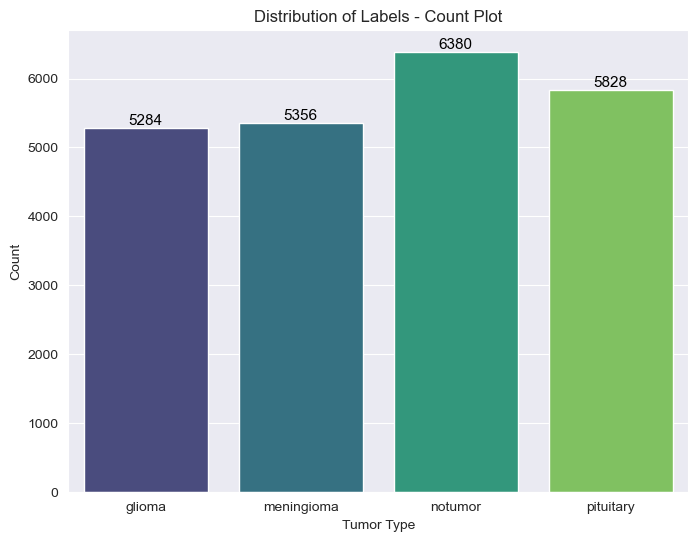

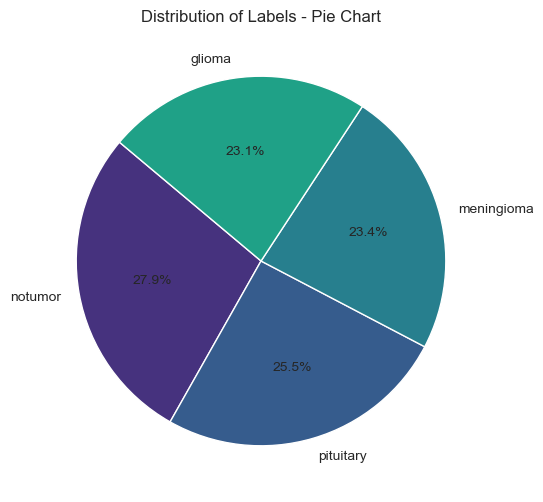

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()


### Count Plot
1. **Figure Setup**:
   - `plt.figure(figsize=(8, 6))` creates a figure with a size of 8x6 inches for the count plot.

2. **Creating the Count Plot**:
   - `sns.countplot(data=df, x="label", palette="viridis")` uses Seaborn to create a count plot of the `label` column in `df`, with each unique label shown along the x-axis and the count (number of occurrences) on the y-axis. The `palette="viridis"` sets the color scheme.

3. **Adding Titles and Labels**:
   - `plt.title("Distribution of Labels - Count Plot")` adds a title to the count plot.
   - `plt.xlabel("Tumor Type")` and `plt.ylabel("Count")` label the x-axis and y-axis, respectively.

4. **Annotating the Bars**:
   - The `for` loop iterates through each bar in the count plot (`plt.gca().patches`) to add a text annotation above each bar.
   - `plt.gca().annotate(...)` adds the count value at the top of each bar to indicate the exact count.

5. **Displaying the Plot**:
   - `plt.show()` displays the count plot.

### Pie Chart
1. **Label Counts**:
   - `label_counts = df['label'].value_counts()` calculates the number of occurrences for each label, giving a series with label names as the index and their counts as values.

2. **Figure Setup for Pie Chart**:
   - `plt.figure(figsize=(8, 6))` creates another figure with a size of 8x6 inches for the pie chart.

3. **Creating the Pie Chart**:
   - `plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))` creates a pie chart:
     - `label_counts` provides the data values.
     - `labels=label_counts.index` uses the label names as pie slice labels.
     - `autopct='%1.1f%%'` displays each slice's percentage.
     - `startangle=140` rotates the start angle of the pie for better alignment.
     - `colors=sns.color_palette("viridis")` sets the color scheme to match the count plot.

4. **Title and Display**:
   - `plt.title("Distribution of Labels - Pie Chart")` adds a title to the pie chart.
   - counts and proportions of each category.

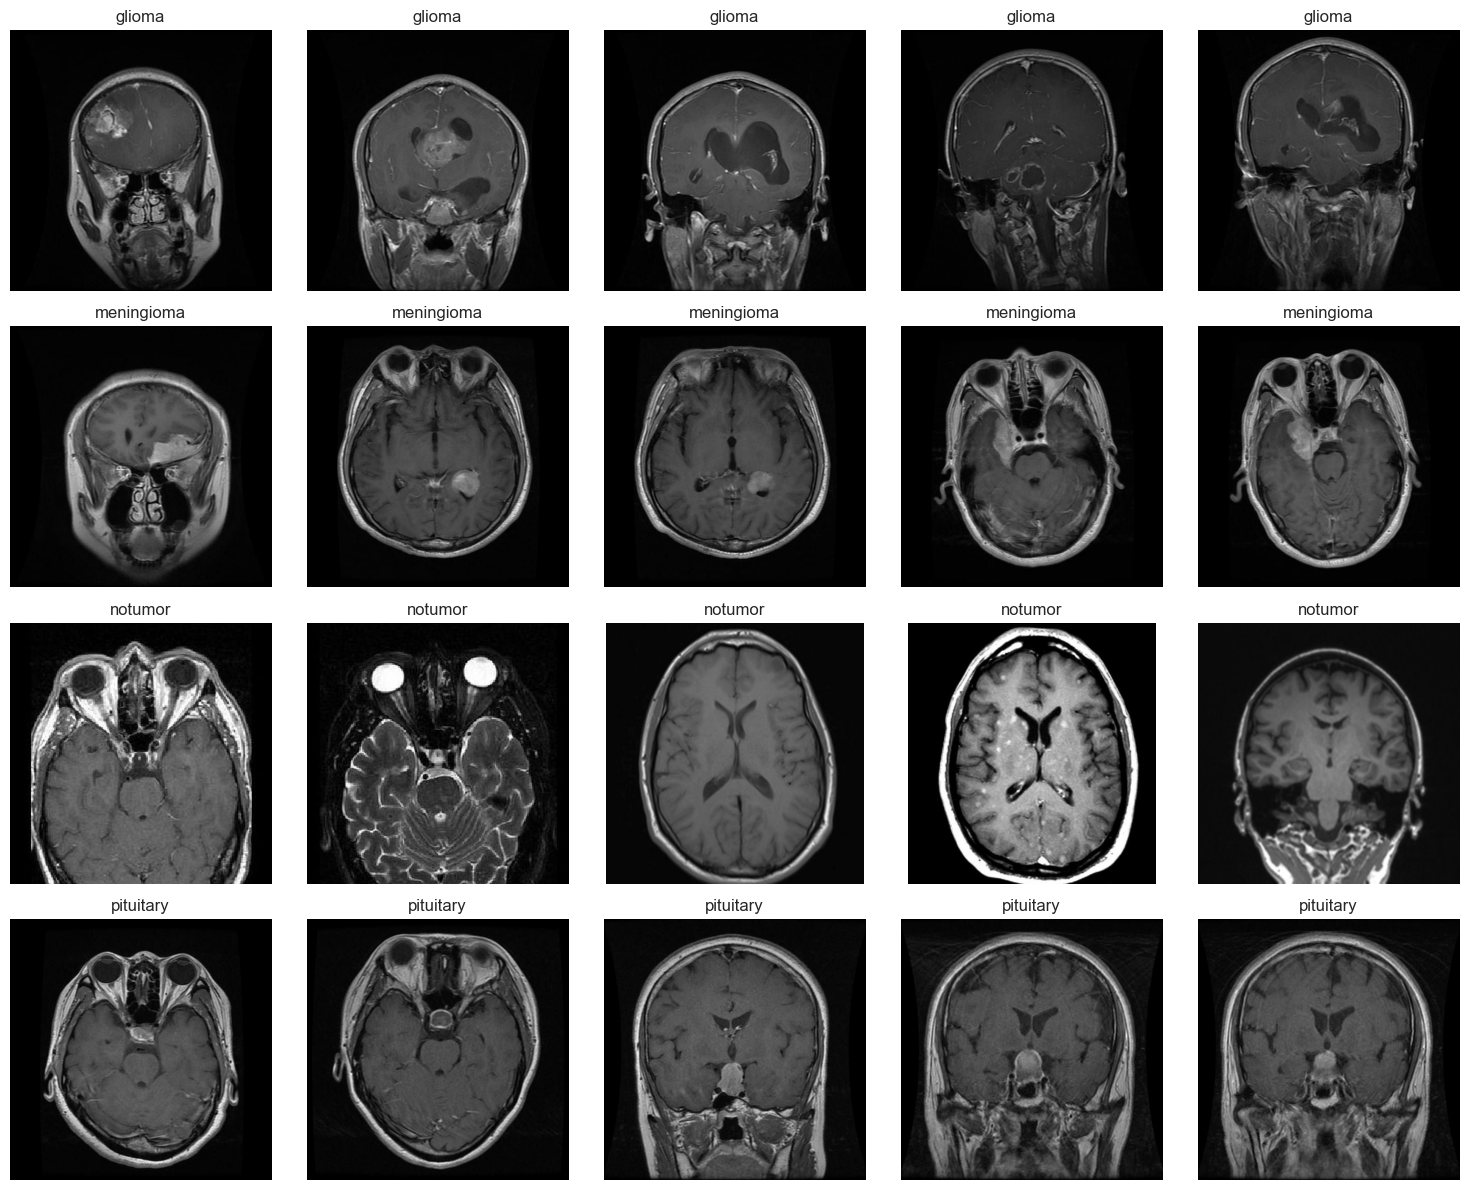

In [98]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()


1. **Importing Libraries**:
   - `cv2` (OpenCV) is used to read and process images, while `plt` (Matplotlib) is used for plotting.

2. **Define the Number of Images per Category**:
   - `num_images = 5` sets the number of images to display for each category.

3. **Create a Figure for Plotting**:
   - `plt.figure(figsize=(15, 12))` sets up a large figure to accommodate multiple images in a grid format.

4. **Loop Through Each Category**:
   - `for i, category in enumerate(categories):` loops through each category in the `categories` list and gives each category a unique index `i`.

5. **Select a Subset of Images for Each Category**:
   - `category_images = df[df['label'] == category]['image_path'].iloc[:num_images]` filters `df` to get only the images in the current `category` and selects the first `num_images` paths for display.

6. **Loop Through Each Selected Image**:
   - `for j, img_path in enumerate(category_images):` iterates through the selected image paths for each category, with `j` as the index.

7. **Read and Convert Image**:
   - `img = cv2.imread(img_path)` reads the image from the `img_path`.
   - `img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` converts the image from BGR (OpenCV's default color format) to RGB for accurate color display with Matplotlib.

8. **Display Image in the Grid**:
   - `plt.subplot(len(categories), num_images, i * num_images + j + 1)` defines the grid layout:
     - `len(categories)` represents the number of rows (one per category).
     - `num_images` represents the number of columns (one per image).
     - `i * num_images + j + 1` calculates the correct position in the grid.
   - `plt.imshow(img)` displays the image in the subplot.
   - `plt.axis('off')` hides the axes around the images for a cleaner look.
   - `plt.title(category)` adds the category name as the title for each image.

9. **Adjust Layout and Show Plot**:
   - `plt.tight_layout()` adjusts spacing to prevent overlap between images.
   - `plt.show()` of images across different categories.

In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [103]:
df = df[['image_path', 'category_encoded']]

In [105]:
from imblearn.over_sampling import RandomOverSampler

In [107]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [109]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled


1. **Import `RandomOverSampler`**:
   - `from imblearn.over_sampling import RandomOverSampler` imports the class used for oversampling.

2. **Initialize the Random Over Sampler**:
   - `ros = RandomOverSampler(random_state=42)` creates an instance of `RandomOverSampler` with a fixed `random_state` of 42 for reproducibility.

3. **Apply Oversampling**:
   - `X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])`:
     - `ros.fit_resample` takes two arguments: 
       - `df[['image_path']]`, which is the feature column (image paths),
       - `df['category_encoded']`, which is the target column containing encoded categories.
     - `fit_resample` returns:
       - `X_resampled`: the oversampled image paths,
       - `y_resampled`: the oversampled category labels, where minority classes are duplicated to balance with majority classes.

4. **Create a Resampled DataFrame**:
   - `df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])` creates a new DataFrame from `X_resampled` with one column, `image_path`.
   - `df_resampled['category_encoded'] = y_resampled` adds a new column, `category_encoded`, with thass imbalance issues.

In machine learning and data science, sampling techniques are used to handle class imbalance or to create subsets of data for training and testing. The best sampling technique often depends on the data characteristics, model, and specific goals. Here’s a summary of the most common sampling techniques and guidelines for when each may be best:

### 1. **Random Sampling**

   - **Simple Random Sampling**: Randomly selects samples from the population. Each sample has an equal chance of being selected.
   - **Stratified Sampling**: Divides the population into subgroups (strata) based on a specific characteristic (e.g., class label) and then samples proportionally from each stratum. Often used to maintain class distribution in the sample.

   **Best Use**: Stratified sampling is particularly useful for ensuring a balanced representation of each class, especially in imbalanced datasets.

### 2. **Oversampling (Used to Address Imbalance)**

   - **Random Oversampling**: Duplicates samples from the minority class to balance class distribution.
   - **Synthetic Minority Over-sampling Technique (SMOTE)**: Generates synthetic samples for the minority class by interpolating between existing samples and their nearest neighbors.
   - **Adaptive Synthetic Sampling (ADASYN)**: A variation of SMOTE that generates more synthetic samples for minority class samples that are harder to classify.

   **Best Use**: Oversampling techniques like SMOTE are often used in classification tasks with imbalanced data, where the minority class has much fewer samples than the majority class. However, oversampling can increase the risk of overfitting, so it’s generally best when combined with regularization techniques or ensemble methods.

### 3. **Undersampling (Used to Address Imbalance)**

   - **Random Undersampling**: Randomly removes samples from the majority class to balance the class distribution.
   - **Cluster Centroid Undersampling**: Reduces the majority class by replacing clusters of majority samples with their centroids.
   - **Near-Miss Method**: Keeps majority samples close to minority samples, removing others that are not near minority class samples.

   **Best Use**: Undersampling can work well with large datasets where there are enough samples from the majority class to maintain useful information even after some are removed. However, undersampling may lead to a loss of information from the majority class, so it’s often paired with ensemble methods.

### 4. **Hybrid Sampling**

   - **Combination of SMOTE and Undersampling**: Uses SMOTE to oversample the minority class and then applies undersampling to reduce the majority class.
   - **Ensemble-based Methods**: Methods like Balanced Random Forest and EasyEnsemble combine undersampling and ensemble learning to handle imbalanced data effectively.

   **Best Use**: Hybrid techniques are effective when there is a significant imbalance and the dataset size allows for a combination of synthetic data generation and undersampling. Ensemble-based hybrids are particularly useful for high-dimensional datasets or when feature complexity is high.

### 5. **Importance Sampling (for Model Training)**

   - **Importance Sampling**: Assigns higher weights to samples that are more informative or likely to improve the model’s performance, which helps focus training on critical samples.
   - **Bootstrapping**: Generates multiple samples (often with replacement) to estimate model variability and build ensemble methods like bagging.

   **Best Use**: Importance sampling is helpful in large-scale learning tasks or when computational resources are limited, as it allows the model to focus on a subset of critical samples. Bootstrapping is key for ensemble learning, especially in decision trees or when building robust models with limited data.

### Choosing the Best Sampling Technique

The best sampling technique depends on the problem and dataset:

- **Imbalanced Classification Problems**: SMOTE or hybrid methods combining SMOTE with undersampling are often most effective, especially with deep learning models that need balanced classes.
- **Large Datasets with Imbalance**: Random undersampling or hybrid ensemble methods like EasyEnsemble are often effective without risking overfitting.
- **Small Datasets with Imbalance**: Random oversampling or SMOTE is generally more helpful as it increases data points for the minority class without reducing the data available.
- **Complex Models (e.g., Neural Networks)**: Oversampling (such as SMOTE) combined with regularization can be useful, while undersampling can lead to loss of important patterns.

Each technique has pros and cons, so it's often helpful to experiment with different sampling methods to determine which works best for your specific task.

In [113]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
0    6380
1    6380
2    6380
3    6380
Name: category_encoded, dtype: int64


In [115]:
df_resampled

image_path  category_encoded
0         data/BrainTumor_1/Train\glioma\0001.jpg                 0
1         data/BrainTumor_1/Train\glioma\0002.jpg                 0
2         data/BrainTumor_1/Train\glioma\0003.jpg                 0
3         data/BrainTumor_1/Train\glioma\0004.jpg                 0
4         data/BrainTumor_1/Train\glioma\0005.jpg                 0
...                                           ...               ...
25515  data/BrainTumor_1/Train\pituitary\0906.jpg                 3
25516  data/BrainTumor_1/Train\pituitary\3472.jpg                 3
25517  data/BrainTumor_1/Train\pituitary\3254.jpg                 3
25518  data/BrainTumor_1/Train\pituitary\2015.jpg                 3
25519  data/BrainTumor_1/Train\pituitary\1642.jpg                 3

[25520 rows x 2 columns]

In [117]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check




### 1. **System and Utility Libraries**
   - **`import time`**: Provides functions to measure and manipulate time. Often used for tracking execution time of code segments.
   - **`import shutil`**: Used for file operations like copying, moving, and removing files or directories.
   - **`import pathlib`**: Helps in handling file paths across different operating systems, making file operations more manageable and cross-platform compatible.
   - **`import itertools`**: Provides tools for iterating over data efficiently, such as generating combinations or permutations, useful in data preprocessing and transformations.

---

### 2. **Image Processing Libraries**
   - **`from PIL import Image`**: Part of the Python Imaging Library (Pillow), this module provides powerful functions for opening, manipulating, and saving different image file formats.
   - **`import cv2`**: Part of the OpenCV library, widely used for computer vision tasks such as image and video processing. It allows transformations like resizing, color conversion, and applying filters.

---

### 3. **Data Visualization Libraries**
   - **`import seaborn as sns`**: A visualization library built on top of Matplotlib, specifically for statistical graphics. Here, `sns.set_style('darkgrid')` sets the overall theme of plots to a dark grid.
   - **`import matplotlib.pyplot as plt`**: A core plotting library in Python, providing comprehensive functions for plotting and customizing visualizations, often used alongside Seaborn.

---

### 4. **Machine Learning and Evaluation Libraries**
   - **`from sklearn.model_selection import train_test_split`**: Part of Scikit-Learn, this function is used to split the data into training and testing subsets, useful for evaluating model performance.
   - **`from sklearn.metrics import confusion_matrix, classification_report`**: Also from Scikit-Learn, these functions calculate performance metrics:
     - `confusion_matrix` gives a summary of prediction outcomes (true positives, false positives, etc.),
     - `classification_report` provides detailed metrics (precision, recall, F1-score) for each class.

---

### 5. **Deep Learning Libraries (TensorFlow and Keras)**
   - **`import tensorflow as tf`**: TensorFlow is a popular deep learning library that provides end-to-end machine learning and deep learning capabilities.
   - **`from tensorflow import keras`**: Keras, now integrated within TensorFlow, offers a user-friendly API for building and training neural networks.
   
   **Keras-specific modules imported**:
   - **`from tensorflow.keras.models import Sequential`**: The Sequential API allows you to build a model layer by layer, suitable for simple feedforward neural networks.
   - **`from tensorflow.keras.optimizers import Adam, Adamax`**: Optimizers for adjusting learning rates during training:
     - `Adam` is a widely used optimizer that combines the benefits of two popular optimizers, AdaGrad and RMSprop.
     - `Adamax` is a variant of Adam optimized for models with sparse gradients.
   - **`from tensorflow.keras.preprocessing.image import ImageDataGenerator`**: Used for real-time data augmentation, it creates batches of image data with random transformations, which improves generalization by increasing the diversity of the training data.
   
   **Keras Layers Imported**:
   - **`Conv2D`**: Convolution layer, essential for capturing spatial hierarchies in image data.
   - **`MaxPooling2D`**: Pooling layer that reduces spatial dimensions to lessen computational load.
   - **`Flatten`**: Converts 2D arrays to 1D arrays, usually at the end of convolutional layers to prepare data for dense layers.
   - **`Dense`**: Fully connected layer; connects each neuron to every neuron in the previous layer.
   - **`Activation`**: Applies activation functions like ReLU or sigmoid to introduce non-linearities.
   - **`Dropout`**: Regularization technique that randomly drops units in the layer during training to prevent overfitting.
   - **`BatchNormalization`**: Normalizes layer inputs, stabilizing and speeding up the training process.
   
   - **`from tensorflow.keras import regularizers`**: Provides regularization techniques to reduce overfitting, like `L1` and `L2` regularization, which penalize large weights.

---

### 6. **Warnings Library**
   - **`import warnings`**: Manages and filters warnings that may appear due to deprecated functions or potential issues in the code. 
   - **`warnings.filterwarnings("ignore")`**: Suppresses warning messages in the output, which is useful in a stable develsformation, model construction, and performance visualization.

In [120]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [122]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

df_resampled: The dataset to split, likely a balanced version of your original data where minority classes have been oversampled.
train_size=0.8: Specifies that 80% of the data will be assigned to the training set (train_df_new), and the remaining 20% will go into a temporary set (temp_df_new).
shuffle=True: Ensures that the data is shuffled before splitting, which is particularly important when the dataset may be ordered by class or some other pattern.
random_state=42: Fixes the randomness to make results reproducible. Using the same random seed (42) ensures the splits are identical each time you run this code.
stratify=df_resampled['category_encoded']: Ensures that each class in the category_encoded column (the labels) is proportionally represented in both the training and temporary sets, preserving the class distribution of the original dataset.

temp_df_new: This temporary set contains 20% of the original data, obtained from the first split.
test_size=0.5: Indicates that this split will allocate 50% of temp_df_new to the validation set (valid_df_new) and 50% to the test set (test_df_new), resulting in each set (validation and test) being 10% of the original dataset.
shuffle=True and random_state=42: Ensures reproducibility and consistency in the split.
stratify=temp_df_new['category_encoded']: Preserves class distribution, so both valid_df_new and test_df_new will reflect the original class balance.

Summary of Splits
Training Set (train_df_new): 80% of the data.
Validation Set (valid_df_new): 10% of the data.
Test Set (test_df_new): 10% of the data.
This setup is useful for ensuring that:

The model trains on 80% of the data.
Model hyperparameters and architecture choices are evaluated on the 10% validation set.
Final model performance is tested on a separate, unseen 10% test set.
Using stratified sampling helps maintain the balance across all sets, which is especially useful for imbalanced datasets to prevent underrepresented classes from being disproportionately split across the training, validation, or test sets.


In [125]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


batch_size = 16: Each batch of data fed to the model contains 16 images.

img_size = (224, 224): Target image size for resizing each image to 224x224 pixels, a standard size used in CNN models like ResNet or VGG.

channels = 3: Specifies 3 color channels (RGB) for each image.

img_shape = (img_size[0], img_size[1], channels): Combines the image dimensions and channels into a shape that models expect, i.e., (224, 224, 3).

tr_gen and ts_gen: ImageDataGenerator objects used to generate batches of image data with optional data augmentation.

rescale=1./255: Normalizes pixel values to the range [0, 1] by dividing each pixel value by 255.

train_df_new: DataFrame containing training data.
x_col='image_path': Column name in train_df_new where image file paths are stored.
y_col='category_encoded': Column name containing class labels (integer-encoded categories).
target_size=img_size: Resizes each image to (224, 224).
class_mode='sparse': Returns labels as integer indices rather than one-hot encoded vectors.
color_mode='rgb': Ensures that images are read as RGB images.
shuffle=True: Shuffles the data before each epoch.
batch_size=batch_size: Feeds data in batches of 16 images.

valid_df_new: DataFrame containing validation data.
Parameters: Similar to the training generator, except that ts_gen is used without shuffling as data augmentation isn’t typically applied to validation data.

test_df_new: DataFrame containing test data.
shuffle=False: Ensures that images in the test set are not shuffled, preserving their order.
Purpose: Feeds data to the model for evaluation.

Summary of Generators
Training Generator (train_gen_new): Feeds augmented data with shuffling, designed to improve model generalization.
Validation Generator (valid_gen_new): Provides non-augmented data, used to validate the model’s performance during training.
Test Generator (test_gen_new): Supplies the model with non-augmented, non-shuffled data for final evaluation, allowing performance comparison across fixed test images.
Overall, these generators make it easy to load, preprocess, and feed large datasets into a model in a memory-efficient way.

In [132]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### # 1. **`import tensorflow as tf`**
   - This imports the TensorFlow library and gives it the alias `tf`, making it easier to reference throughout your code.
   - TensorFlow is a deep learning framework developed by Google, which is widely used for building and training machine learning and deep learning models.

### 2. **`from tensorflow.keras import layers, models`**
   - **`layers`**: This module provides various neural network layers like `Dense`, `Conv2D`, `MaxPooling2D`, `Flatten`, etc., which can be used to build complex architectures.
      - For example, `layers.Dense(64)` adds a fully connected layer with 64 neurons.
      - `layers.Conv2D(32, (3, 3))` creates a convolutional layer with 32 filters of size 3x3.
   - **`models`**: Contains classes like `Sequential` and `Model`, which allow you to define your neural network models.
      - `Sequential`: A linear stack of layers, where you define each layer sequentially.
      - `Model`: Allows for more complex architectures, including branching and merging layers.

### 3. **`from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint`**
   - **`EarlyStopping`**:
      - This callback stops training when a monitored metric (e.g., validation loss) has stopped improving for a set number of epochs. 
      - It helps avoid overfitting and reduces the training time by stopping once the model's performance stagnates.
      - Example usage: `EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)`.
   - **`ModelCheckpoint`**:
      - This callback saves the model at specific checkpoints during training. You can configure it to save only the best-performing model based on a metric, such as validation accuracy.
      - Useful for model recovery and for loading the best model after training completes.
      - Example usage: `ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', opping, model checkpoints).

In [135]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [137]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### `EarlyStopping` Parameters Explained
```python
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
```

1. **`monitor='val_loss'`**
   - This specifies that `EarlyStopping` will monitor the validation loss during training.
   - Validation loss is often used to determine when the model begins to overfit. If the validation loss stops improving, it can indicate that further training might not improve generalization.

2. **`patience=5`**
   - `patience` sets the number of epochs to wait after the last time validation loss improved before stopping training.
   - Here, patience is set to 5, meaning if the validation loss does not improve for 5 consecutive epochs, training will be stopped.
   - This parameter allows some flexibility, as sometimes a model may not improve for a few epochs and then improve in later ones.

3. **`restore_best_weights=True`**
   - This ensures that, once training stops, the model weights are set back to those from the epoch with the lowest validation loss (the "best" epoch).
   - This way, the model is reverted to its most effective state rather than using the weights from the last training epoch, which may not have performed as well.

### Summary
The configuration of `EarlyStopping` with `monitor='val_loss'`, `patience=5`, and `restore_best_weights=True` is designed to help you:
   - Avoid overfitting by halting training once validation loss no longer improves,
   - Provide a buffer to allow minor fluctuations (by using `patience`),
   - Ensure that the best version of the model (in terms of validation loss) is retained. 

This setup helps make training more efficient by stopping when further training isn’t beneficial, while also ensuring that the best version of the model is kept.

In [156]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, 
                                     GaussianNoise, Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_vgg16_model(input_shape):
   
    inputs = Input(shape=input_shape)
    
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    #height, width, channels = 7, 7, 512  
    #x = Reshape((height * width, channels))(x)
    
    #attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    #attention_output = MultiHeadAttention(num_heads=4, key_dim=channels)(x, x)
    #attention_output = Reshape((height, width, channels))(attention_output)
    
    #x = GaussianNoise(0.25)(attention_output)
    x = GaussianNoise(0.25)(x)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

#cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
cnn_model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [160]:
total_train_batches = len(train_gen_new)  # Total batches in train generator
total_valid_batches = len(valid_gen_new)  # Total batches in validation generator


In [166]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  # Total epochs
    steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,  # Optional: Half validation batches
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7041 - loss: 0.8406 - val_accuracy: 0.5562 - val_loss: 1.1909
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7421 - loss: 0.7300 - val_accuracy: 0.5188 - val_loss: 1.5499
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7423 - loss: 0.6899 - val_accuracy: 0.7312 - val_loss: 0.7151
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7335 - loss: 0.7547 - val_accuracy: 0.4688 - val_loss: 2.3219
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7700 - loss: 0.6994 - val_accuracy: 0.7125 - val_loss: 0.8745


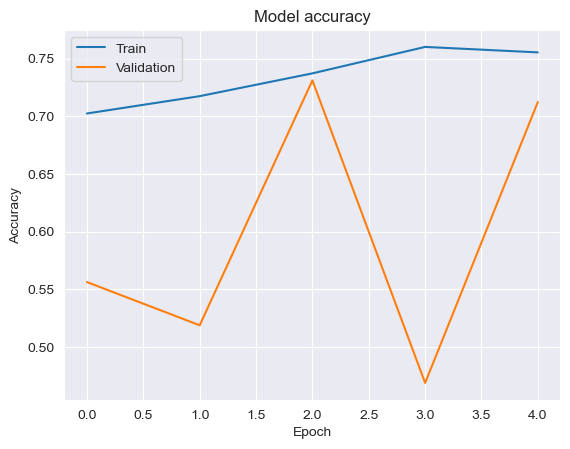

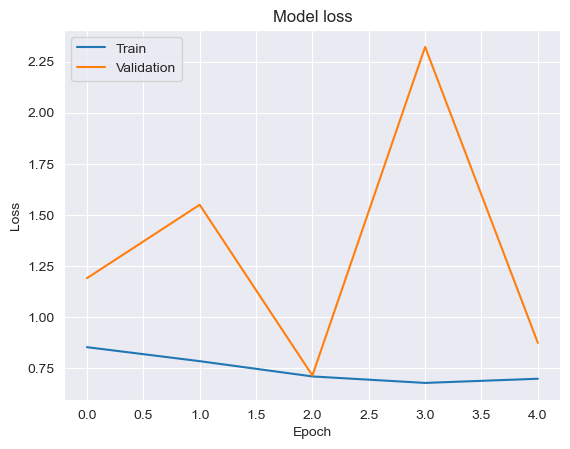

In [168]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [198]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step


In [199]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       638
           1       0.63      0.74      0.68       638
           2       0.96      0.85      0.90       638
           3       0.91      0.61      0.73       638

    accuracy                           0.77      2552
   macro avg       0.80      0.77      0.77      2552
weighted avg       0.80      0.77      0.77      2552



In [200]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

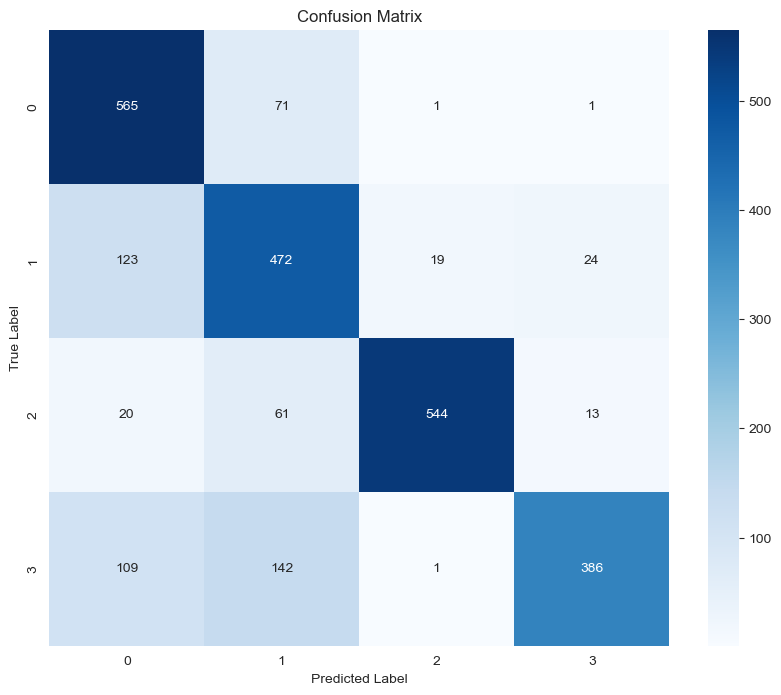

In [201]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [202]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_vgg19_model(input_shape):
  
    inputs = Input(shape=input_shape)
    
    base_model = VGG19(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512   
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg19_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [229]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,  # Optional: Half validation batches
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.6792 - loss: 0.8006 - val_accuracy: 0.3313 - val_loss: 1.1449
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7621 - loss: 0.6255 - val_accuracy: 0.6187 - val_loss: 1.0530
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7582 - loss: 0.6367 - val_accuracy: 0.5938 - val_loss: 0.9195
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7881 - loss: 0.5858 - val_accuracy: 0.6000 - val_loss: 0.9492
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7743 - loss: 0.6152 - val_accuracy: 0.7063 - val_loss: 0.7901


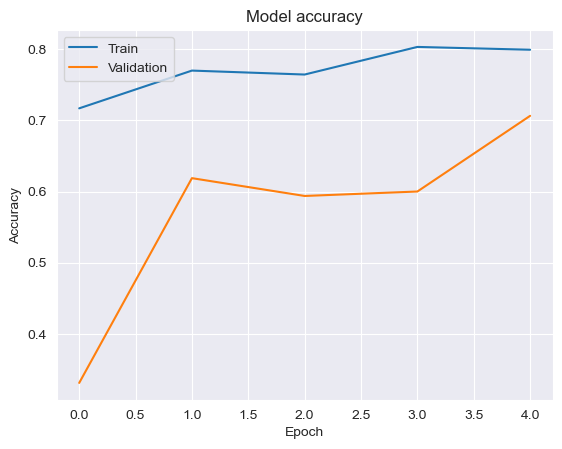

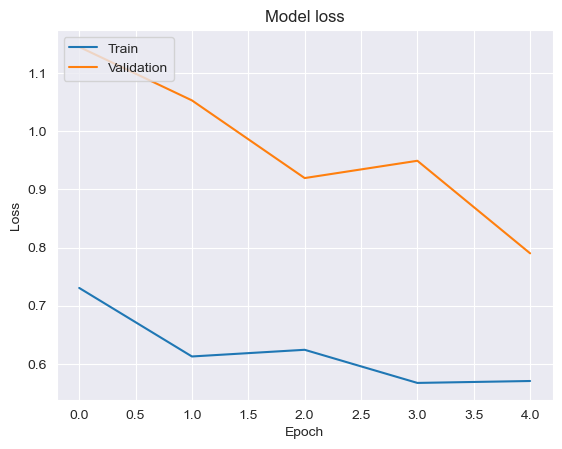

In [230]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [231]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step


In [232]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.28      1.00      0.43       638
           1       0.00      0.00      0.00       638
           2       1.00      0.11      0.19       638
           3       0.53      0.14      0.22       638

    accuracy                           0.31      2552
   macro avg       0.45      0.31      0.21      2552
weighted avg       0.45      0.31      0.21      2552



In [233]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

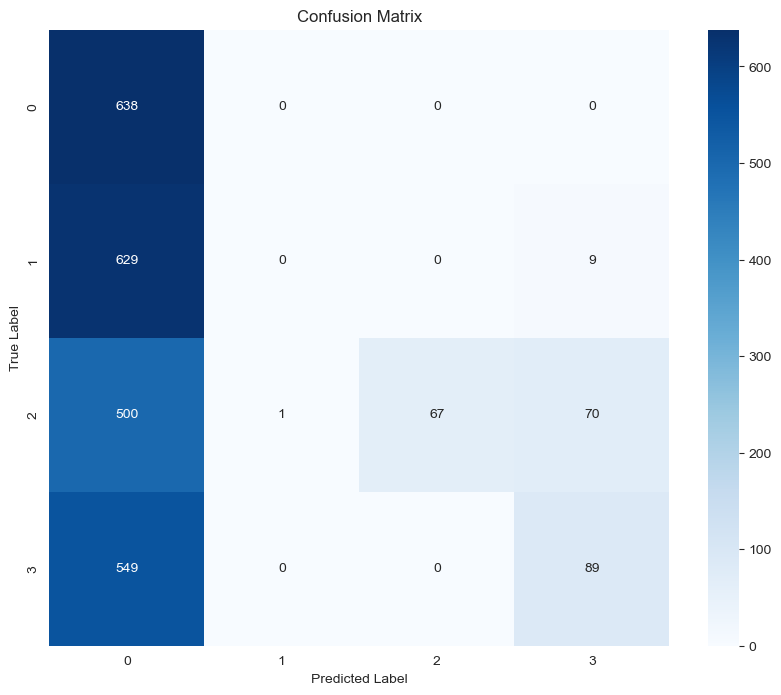

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [235]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
  
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [236]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,  # Optional: Half validation batches
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 512ms/step - accuracy: 0.7080 - loss: 0.8668 - val_accuracy: 0.8125 - val_loss: 0.5260
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 495ms/step - accuracy: 0.8666 - loss: 0.4243 - val_accuracy: 0.6187 - val_loss: 1.2094
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 506ms/step - accuracy: 0.8951 - loss: 0.3340 - val_accuracy: 0.8375 - val_loss: 0.4145
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 493ms/step - accuracy: 0.8672 - loss: 0.3917 - val_accuracy: 0.8250 - val_loss: 0.5655
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 498ms/step - accuracy: 0.8706 - loss: 0.3865 - val_accuracy: 0.9125 - val_loss: 0.3273


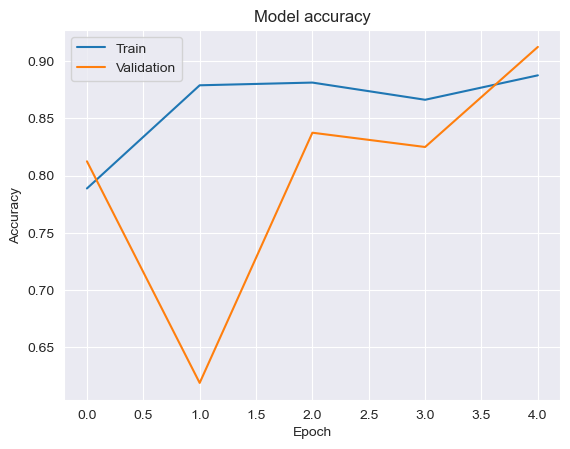

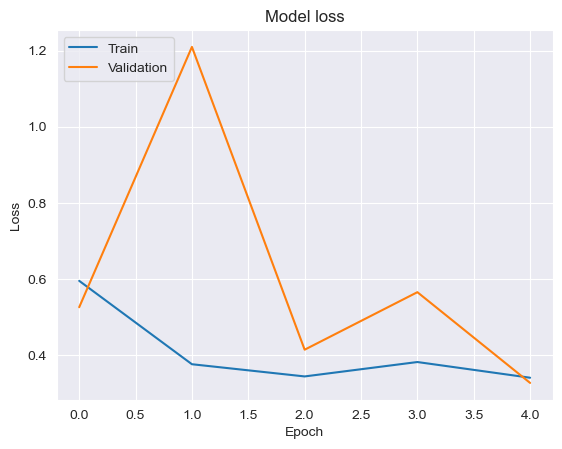

In [237]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [238]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step


In [239]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       638
           1       0.78      0.90      0.83       638
           2       0.99      0.93      0.96       638
           3       0.93      0.95      0.94       638

    accuracy                           0.90      2552
   macro avg       0.91      0.90      0.91      2552
weighted avg       0.91      0.90      0.91      2552



In [240]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

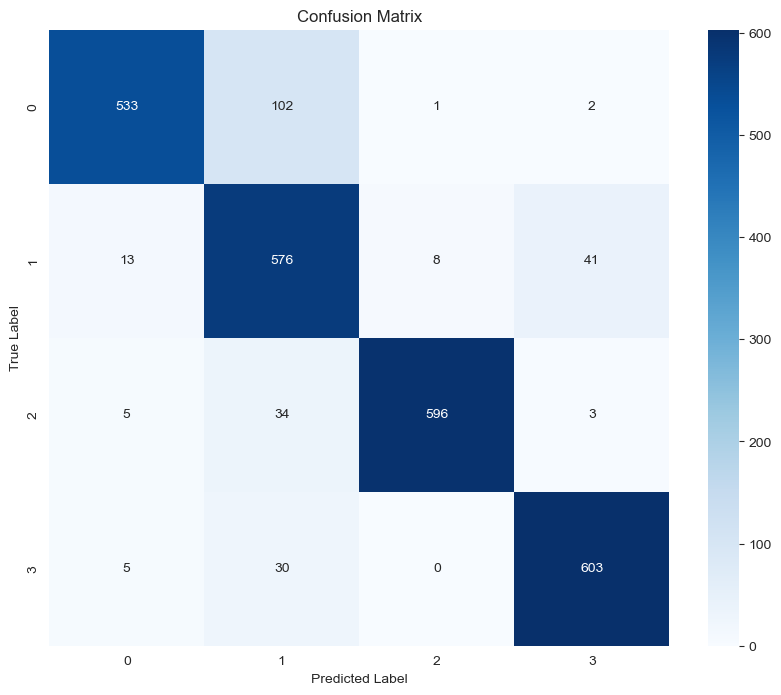

In [241]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [242]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [247]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    steps_per_epoch=total_train_batches // 32,  # Half the training batches
    validation_steps=total_valid_batches // 32,  # Optional: Half validation batches
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 264s 6s/step - accuracy: 0.7104 - loss: 0.8398 - val_accuracy: 0.8375 - val_loss: 0.7192
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.7536 - loss: 0.6893 - val_accuracy: 0.7625 - val_loss: 0.6948
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.8223 - loss: 0.5335 - val_accuracy: 0.6250 - val_loss: 0.9361
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.8334 - loss: 0.4631 - val_accuracy: 0.6125 - val_loss: 1.0549
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.8340 - loss: 0.4962 - val_accuracy: 0.7875 - val_loss: 0.5033


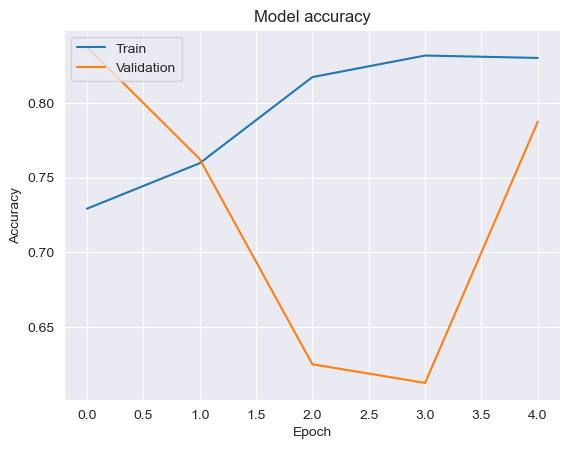

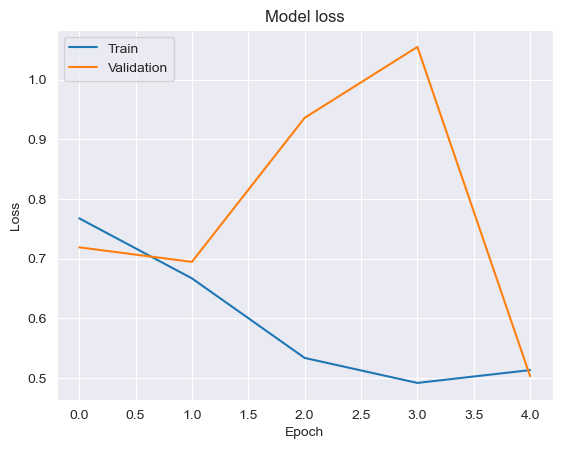

In [249]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [251]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 132s 792ms/step


In [252]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       638
           1       0.71      0.63      0.67       638
           2       0.72      0.97      0.82       638
           3       0.78      0.80      0.79       638

    accuracy                           0.77      2552
   macro avg       0.78      0.77      0.76      2552
weighted avg       0.78      0.77      0.76      2552



In [253]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

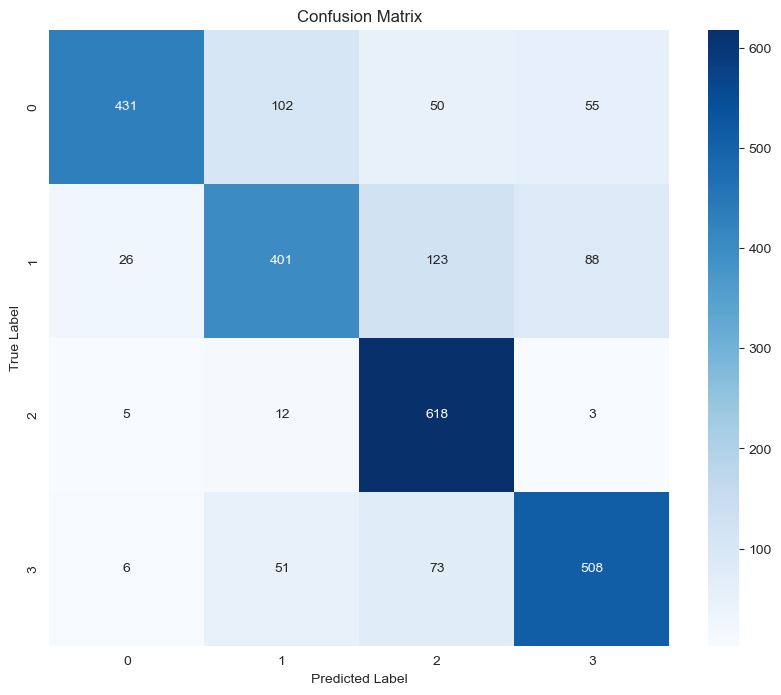

In [254]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [255]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [258]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    steps_per_epoch=total_train_batches // 32,  # Half the training batches
    validation_steps=total_valid_batches // 32,  # Optional: Half validation batches
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.6007 - loss: 1.1337 - val_accuracy: 0.6125 - val_loss: 1.2903
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.6437 - loss: 0.9043 - val_accuracy: 0.7875 - val_loss: 0.5260
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 185s 5s/step - accuracy: 0.7560 - loss: 0.6710 - val_accuracy: 0.6500 - val_loss: 1.2083
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.7632 - loss: 0.6068 - val_accuracy: 0.8125 - val_loss: 0.4585
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7797 - loss: 0.6532 - val_accuracy: 0.8625 - val_loss: 0.4073


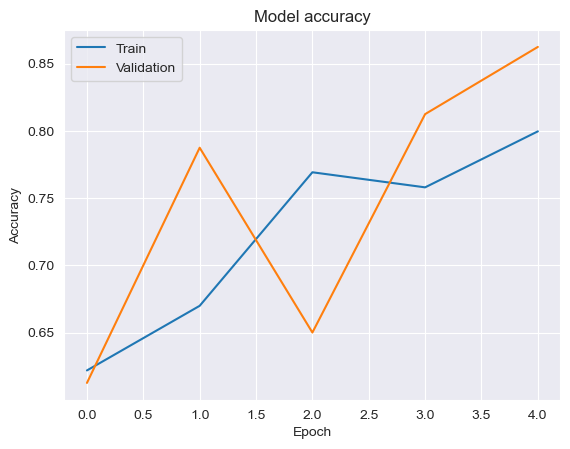

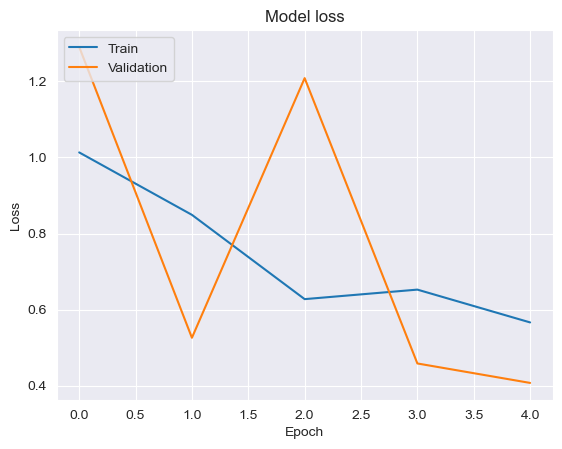

In [259]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [260]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 483ms/step


In [261]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.55      0.91      0.68       638
           1       0.56      0.29      0.38       638
           2       1.00      0.33      0.49       638
           3       0.58      0.86      0.69       638

    accuracy                           0.60      2552
   macro avg       0.67      0.60      0.56      2552
weighted avg       0.67      0.60      0.56      2552



In [262]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

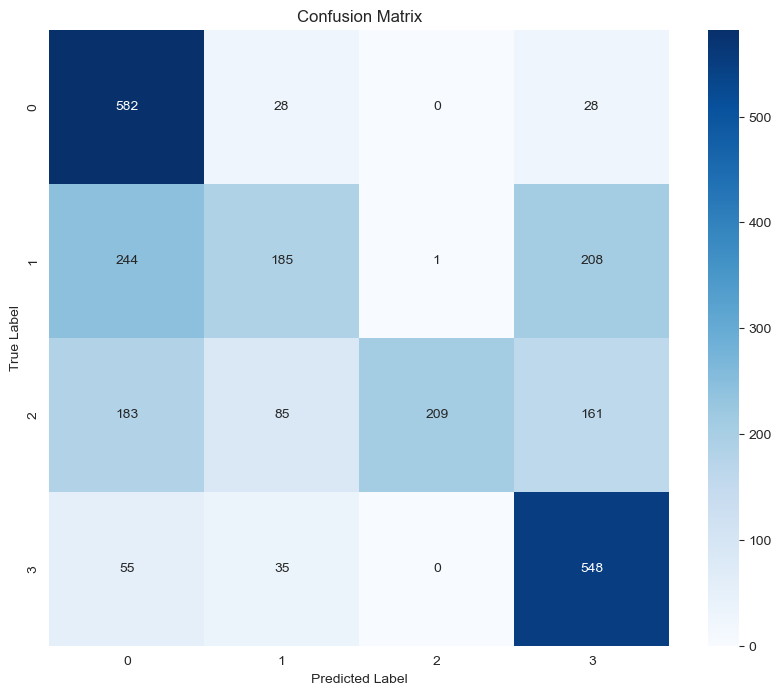

In [263]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

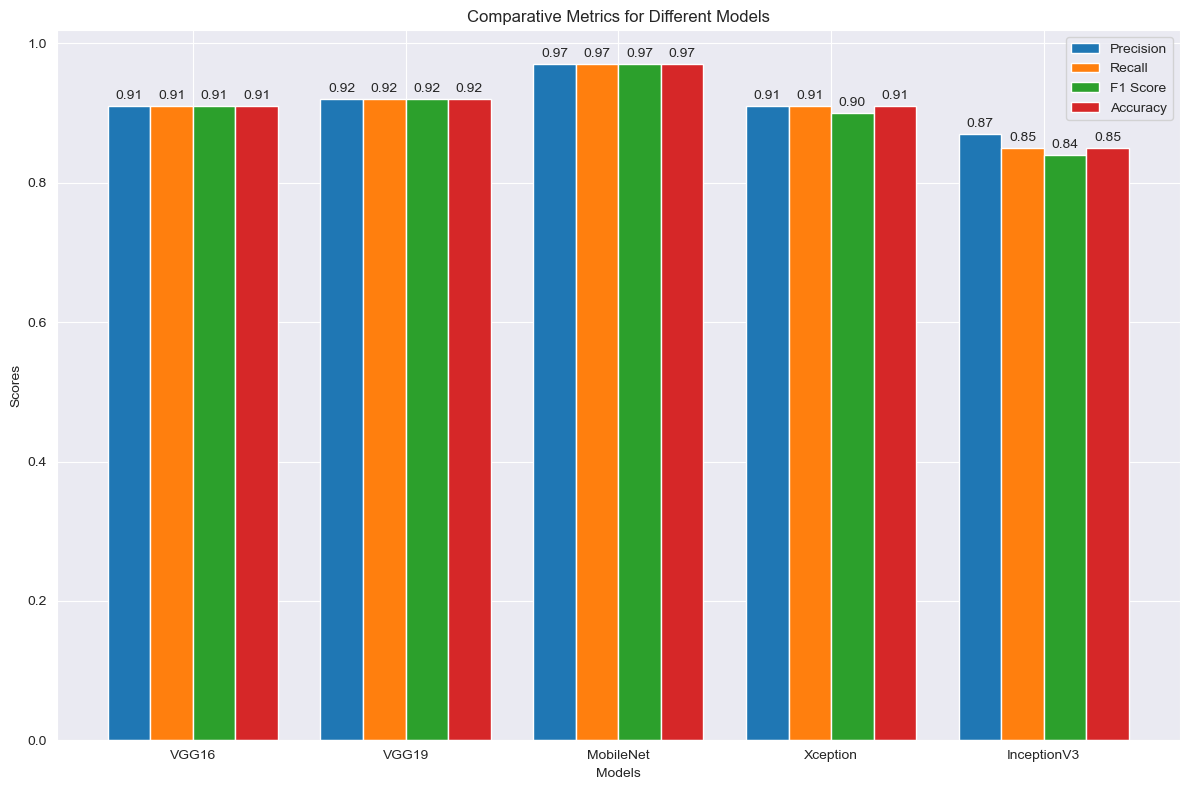

In [264]:
models = ['VGG16', 'VGG19', 'MobileNet', 'Xception', 'InceptionV3']
precision_scores = [0.91, 0.92, 0.97, 0.91, 0.87]
recall_scores = [0.91, 0.92, 0.97, 0.91, 0.85]
f1_scores = [0.91, 0.92, 0.97, 0.90, 0.84]
accuracy_scores = [0.91, 0.92, 0.97, 0.91, 0.85]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(index, precision_scores, bar_width, label='Precision')
bars2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall')
bars3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score')
bars4 = ax.bar(index + 3 * bar_width, accuracy_scores, bar_width, label='Accuracy')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparative Metrics for Different Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()